# DataSynthesizer Usage (correlated attribute mode)

> This is a quick demo to use DataSynthesizer in correlated attribute mode.

### Step 1 import packages

In [74]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets, linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [107]:
#Data exploration and manipulation
df = pd.read_csv('./data/UCI_DATA_ADULT.csv', names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]) 
df_synth = pd.read_csv('./out/correlated_attribute_mode/uci_synthetic_data.csv', names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]) 


df = df.drop([0])
df_synth = df_synth.drop([0])

#df["workclass"]
df_synth["income"]

1        <=50K
2         >50K
3        <=50K
4         >50K
5        <=50K
         ...  
32558    <=50K
32559     >50K
32560     >50K
32561    <=50K
32562    <=50K
Name: income, Length: 32562, dtype: object

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
print(df[['age', 'hours-per-week', 'income']])

      age hours-per-week  income
1      39             40   <=50K
2      50             13   <=50K
3      38             40   <=50K
4      53             40   <=50K
5      28             40   <=50K
...    ..            ...     ...
32557  27             38   <=50K
32558  40             40    >50K
32559  58             40   <=50K
32560  22             20   <=50K
32561  52             40    >50K

[32561 rows x 3 columns]


In [108]:
#Keep this separate, as running this more than once converts all income levels to 1.
# but before we make our model, we need to modify our data a bit

# little baby helper function
def incomeFixer(x):
    if x == "<=50K":
        return 0
    else:
        return 1

# change the income data into 0's and 1's
df_synth['income'] = df_synth.apply(lambda row: incomeFixer(row['income']), axis=1)
df['income'] = df.apply(lambda row: incomeFixer(row['income']), axis=1)

In [109]:


# get the data we are going to make the model with 
x = np.array(df[['age', 'hours-per-week']])
y = np.array(df['income'])

# again, lets make the scikitlearn gods happy
#x = x.reshape(-1,1)
#print(x)
# Making the test-train split
splits = train_test_split(x ,y ,test_size=0.25, random_state=42)
x_train, x_test, y_train, y_test = splits

# get the data we are going to make the model with 
x_synth = np.array(df_synth[['age', 'hours-per-week']])
y_synth = np.array(df_synth['income'])

# again, lets make the scikitlearn gods happy
#x = x.reshape(-1,1)
#print(x)
# Making the test-train split
splits_synth = train_test_split(x_synth ,y_synth ,test_size=0.25, random_state=42)
x_train_synth, x_test_synth, y_train_synth, y_test_synth = splits_synth



In [111]:
print(y_train_synth[10:1000])

[1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 

In [112]:
#Defining a data model
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train_synth, y_train_synth)

LogisticRegression(solver='liblinear')

In [115]:
print(logreg.score(x_test, y_test))

0.00012283503255128362


### Step 2 user-defined parameteres

In [75]:
# input dataset
input_data = './data/UCI_Parsed_Data.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'./out/{mode}/uci_description.json'
synthetic_data = f'./out/{mode}/uci_synthetic_data.csv'

!mkdir mode

A subdirectory or file mode already exists.


Default values set here, change here if needed.

In [76]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 20

# specify categorical attributes
categorical_attributes = {'Nat-Country': True }

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'age': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 1

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 32562 # Here 32561 is the same as input dataset, but it can be set to another number.

### Step 3 DataDescriber

1. Instantiate a DataDescriber.
2. Compute the statistics of the dataset.
3. Save dataset description to a file on local machine.

In [77]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT Nat-Country
Adding attribute Race
Adding attribute Sex
Adding attribute Relationship
Adding attribute Marital Status
Adding attribute Income_Lvl
Adding attribute Age
Adding attribute Education
Adding attribute Education-Number
Adding attribute Occupation
Adding attribute HPW
Adding attribute Workclass
Adding attribute Capital-Gain
Adding attribute fnlwgt
Adding attribute Capital-Loss
========================== BN constructed ==========================


In [78]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    Race             has parents ['Nat-Country'].
    Sex              has parents ['Race', 'Nat-Country'].
    Relationship     has parents ['Sex', 'Nat-Country'].
    Marital Status   has parents ['Relationship', 'Sex'].
    Income_Lvl       has parents ['Relationship', 'Race'].
    Age              has parents ['Marital Status', 'Sex'].
    Education        has parents ['Age', 'Nat-Country'].
    Education-Number has parents ['Education', 'Race'].
    Occupation       has parents ['Education-Number', 'Relationship'].
    HPW              has parents ['Relationship', 'Sex'].
    Workclass        has parents ['Occupation', 'Education-Number'].
    Capital-Gain     has parents ['HPW', 'Sex'].
    fnlwgt           has parents ['Capital-Gain', 'Occupation'].
    Capital-Loss     has parents ['Workclass', 'Relationship'].


### Step 4 generate synthetic dataset

1. Instantiate a DataGenerator.
2. Generate a synthetic dataset.
3. Save it to local machine.

In [79]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

### Step 5 compare the statistics of input and sythetic data (optional)

The synthetic data is already saved in a file by step 4. The ModelInspector is for a quick test on the similarity between input and synthetic datasets.

#### 5.1 instantiate a ModelInspector.

It needs input dataset, synthetic dataset, and attribute description.

In [80]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

#### 5.2 compare histograms between input and synthetic datasets.

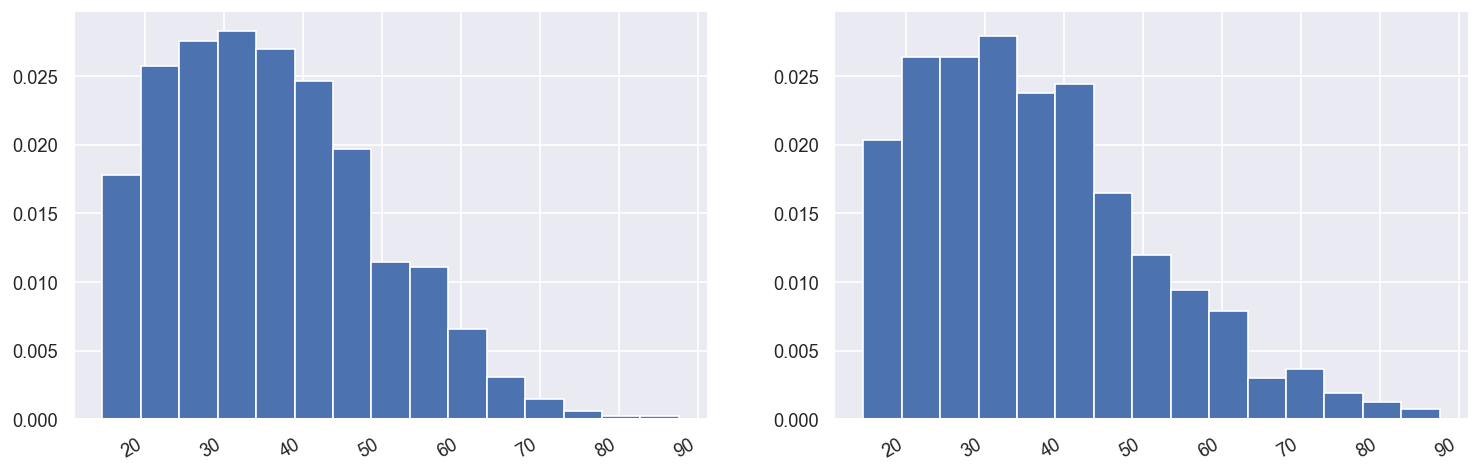

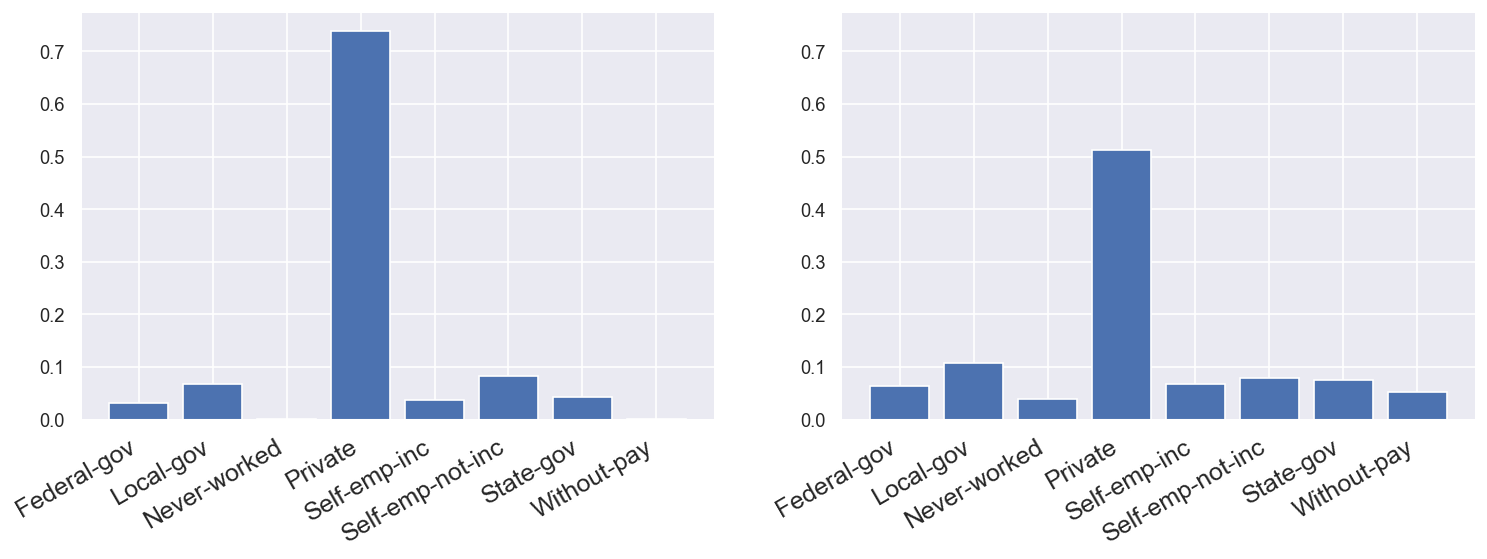

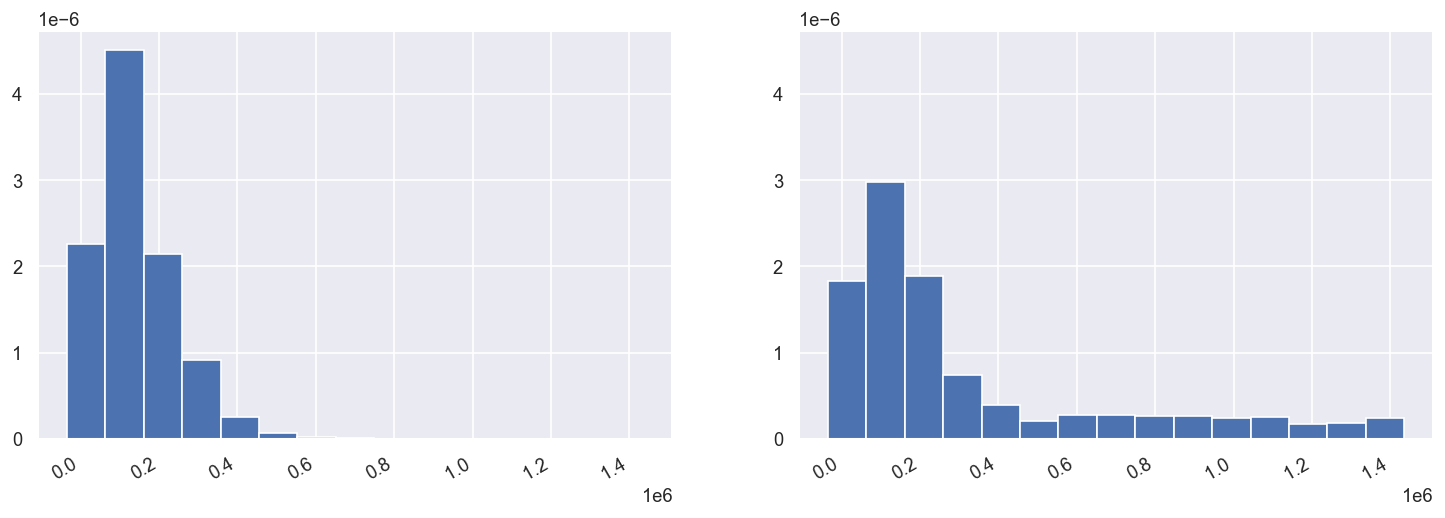

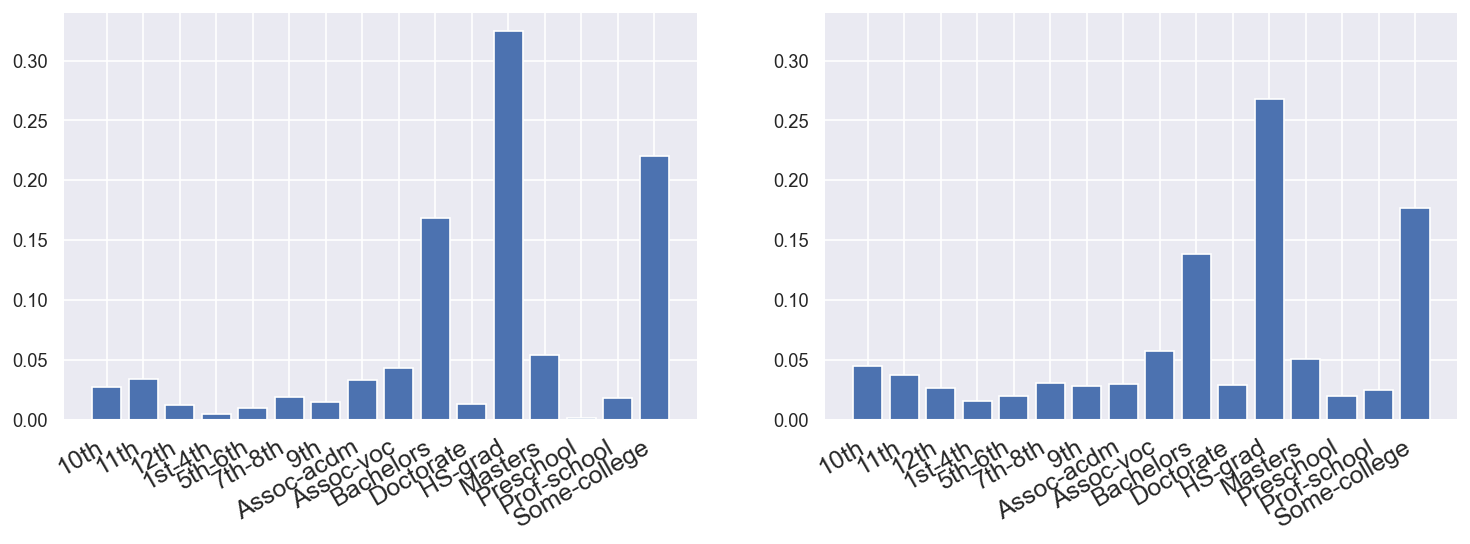

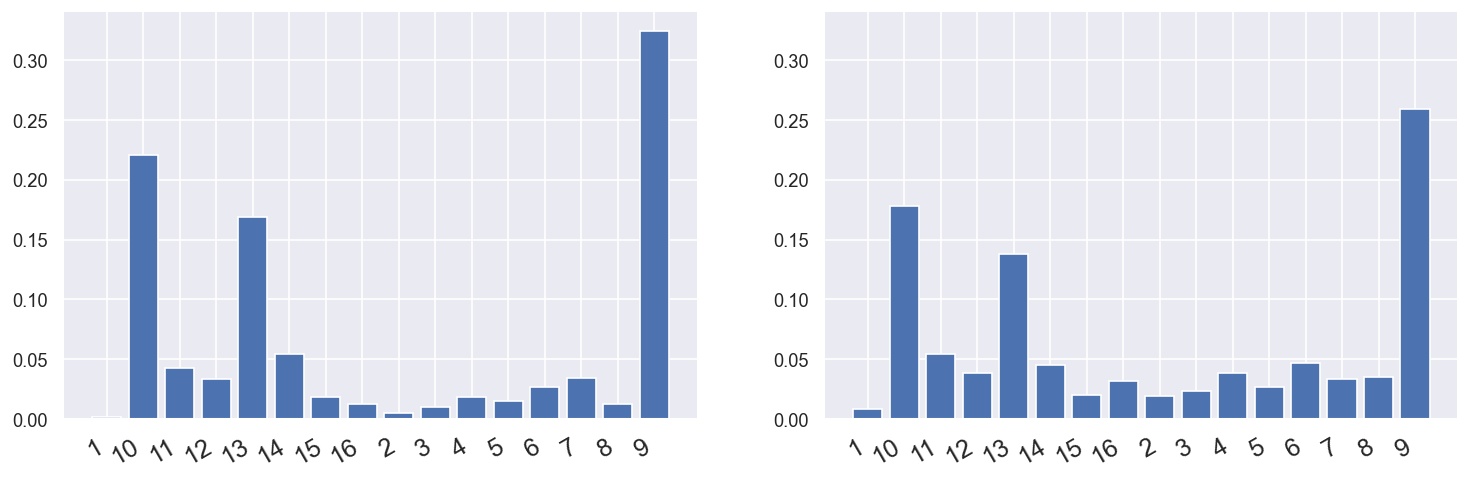

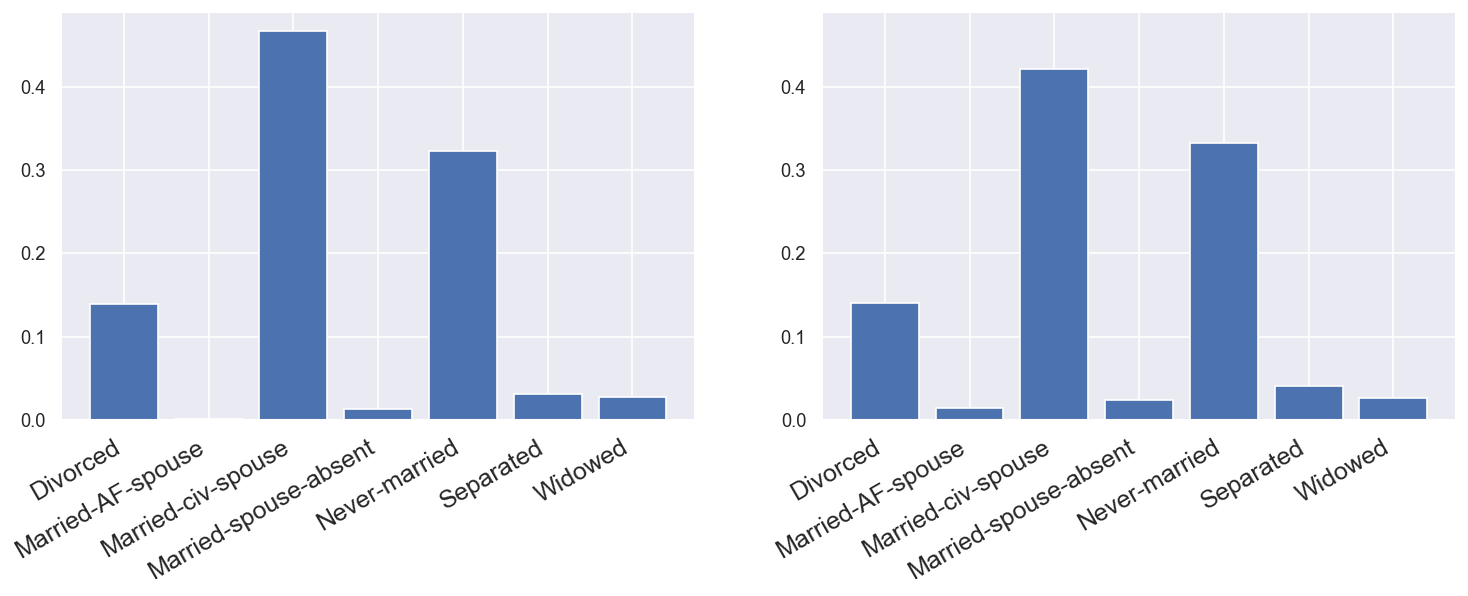

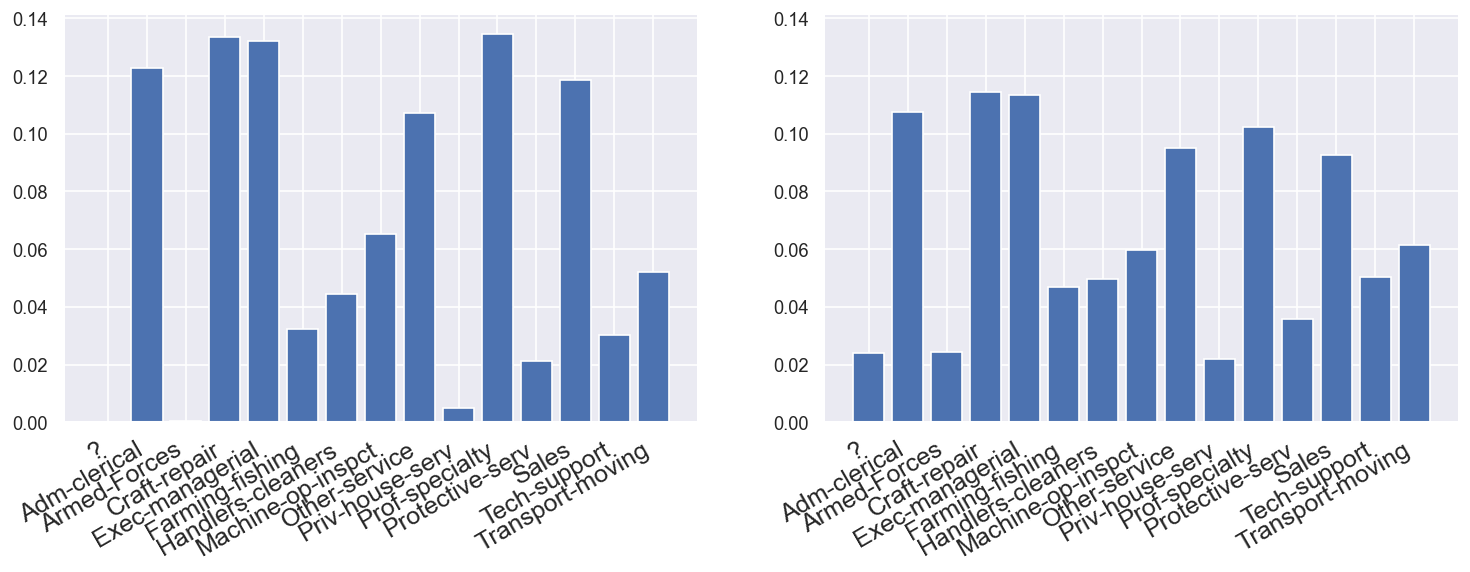

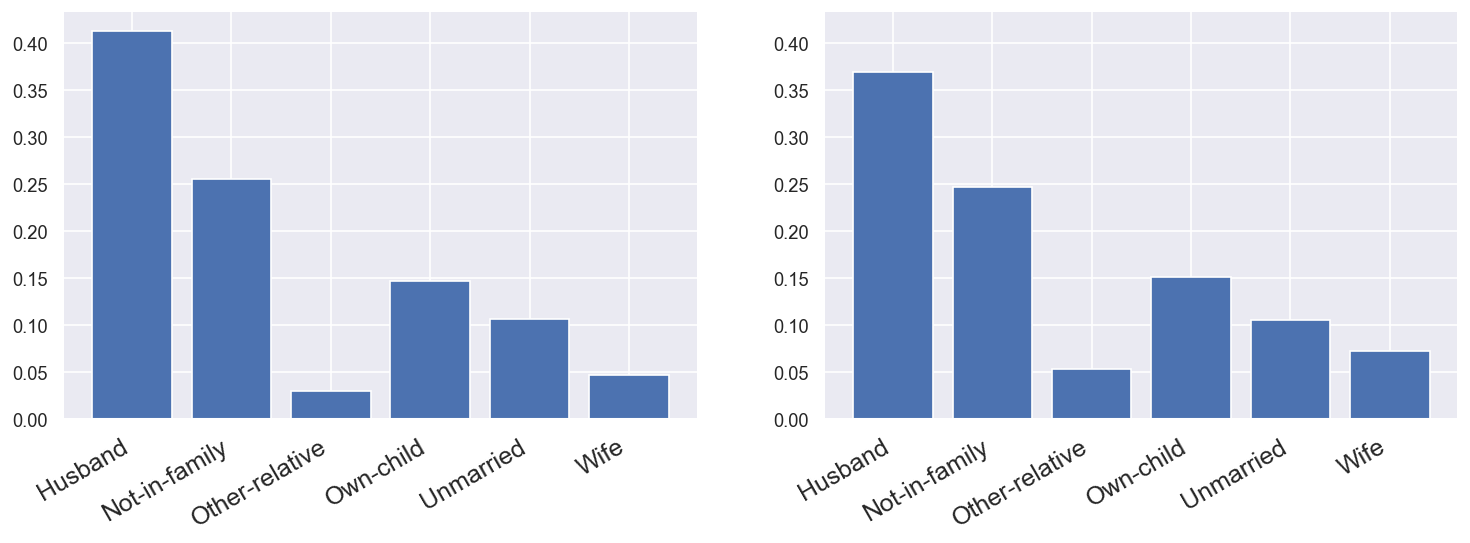

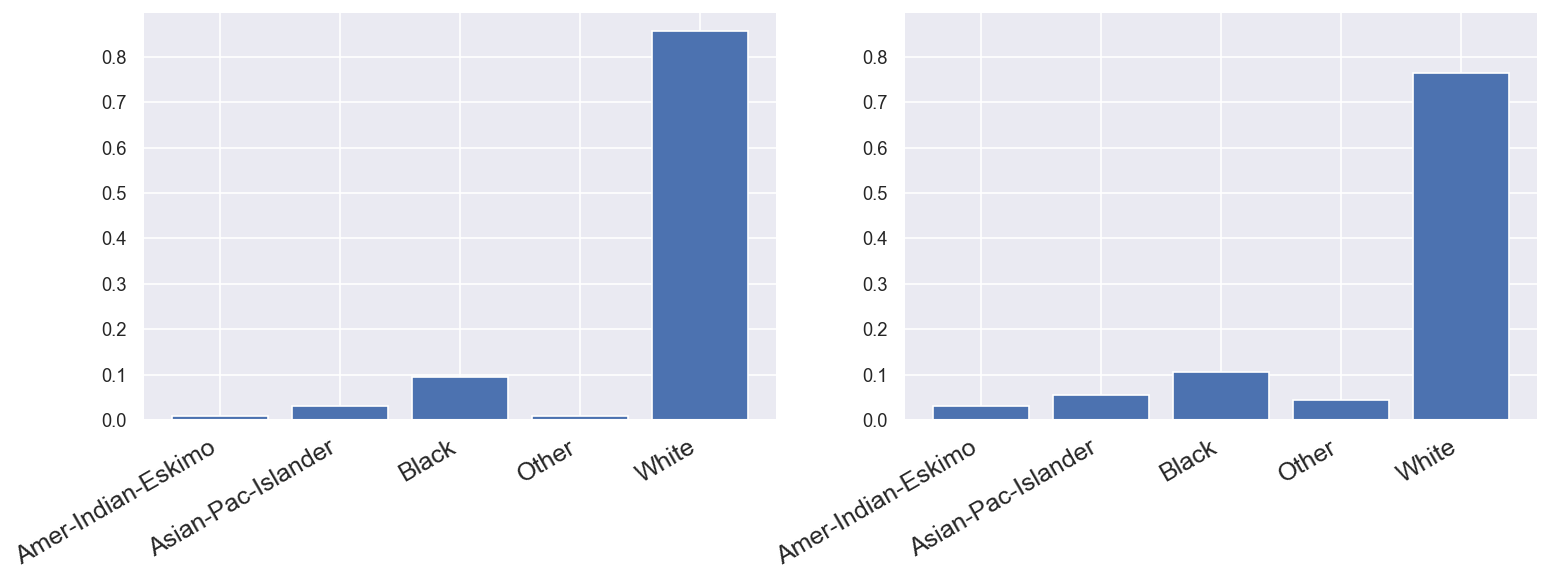

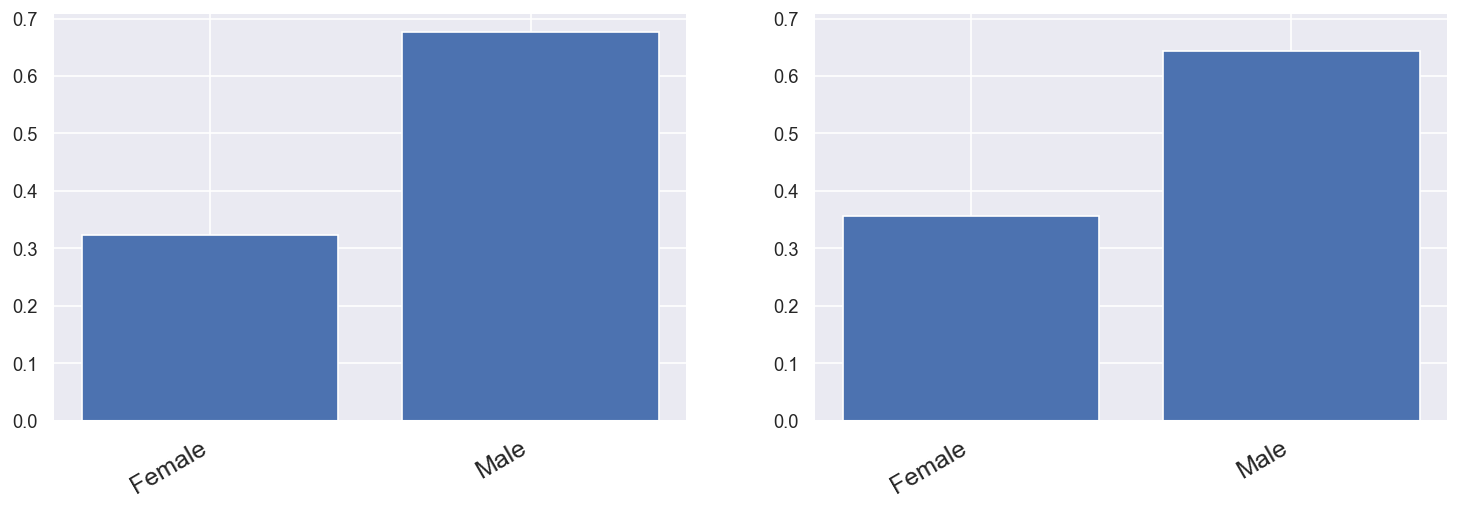

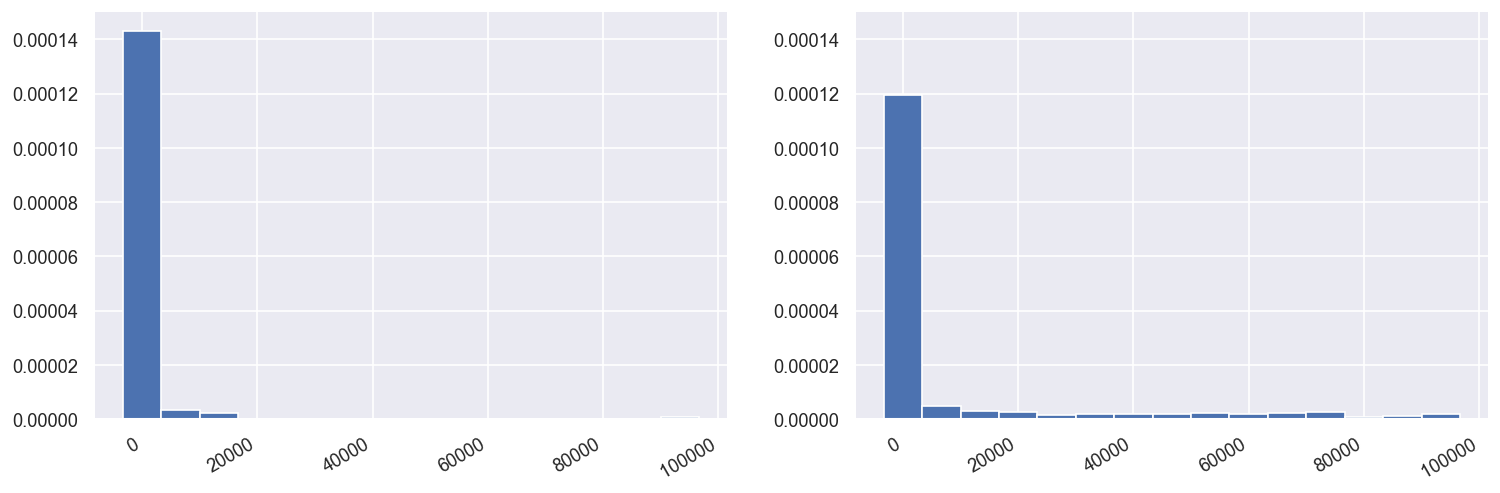

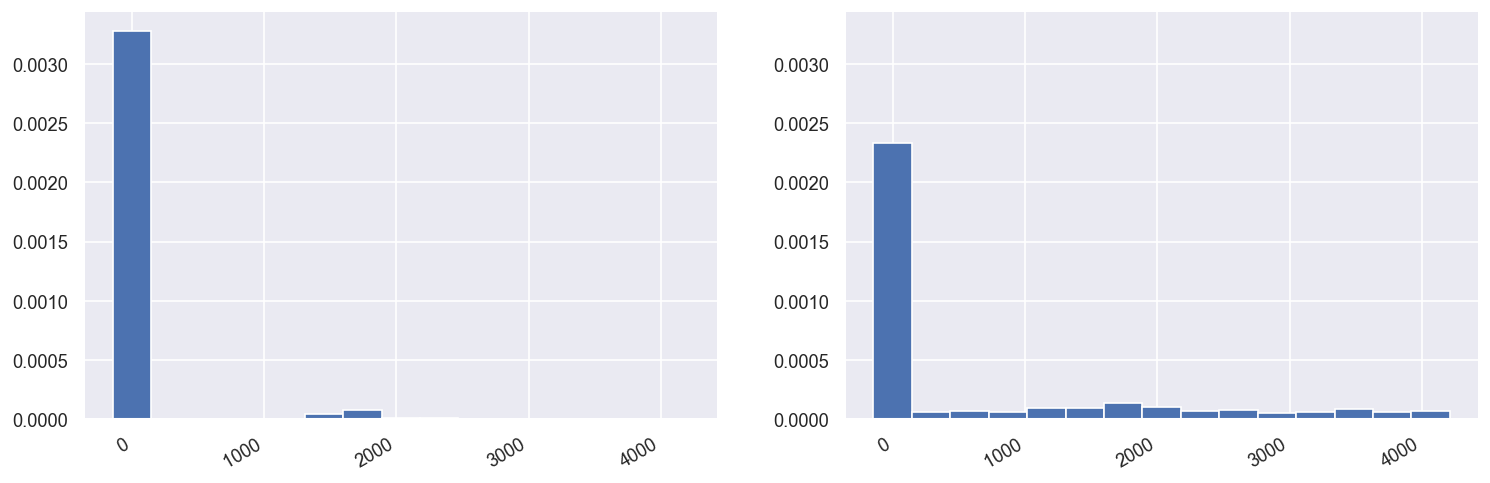

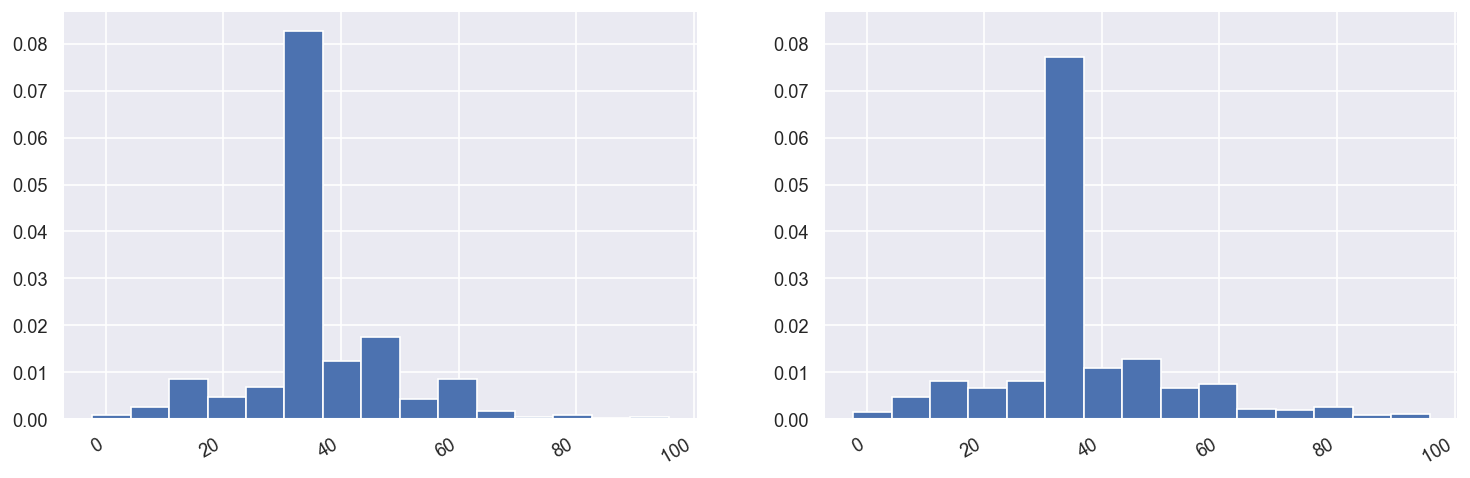

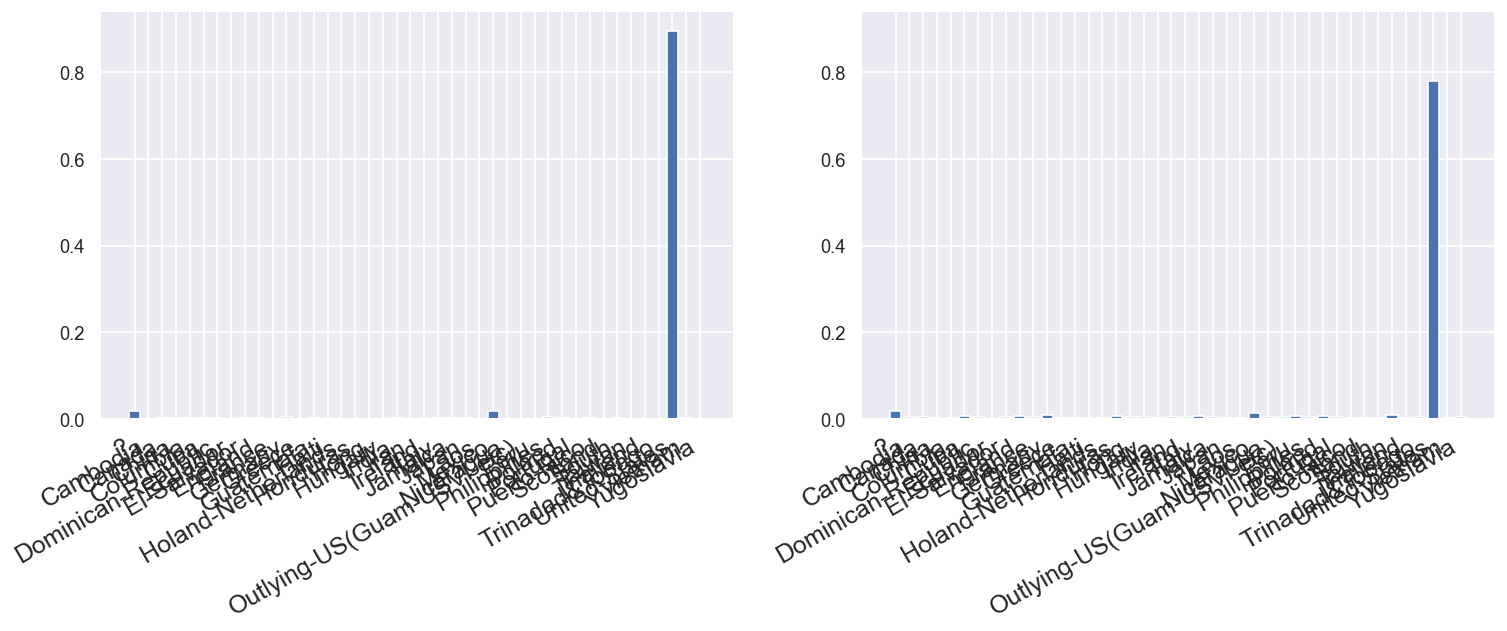

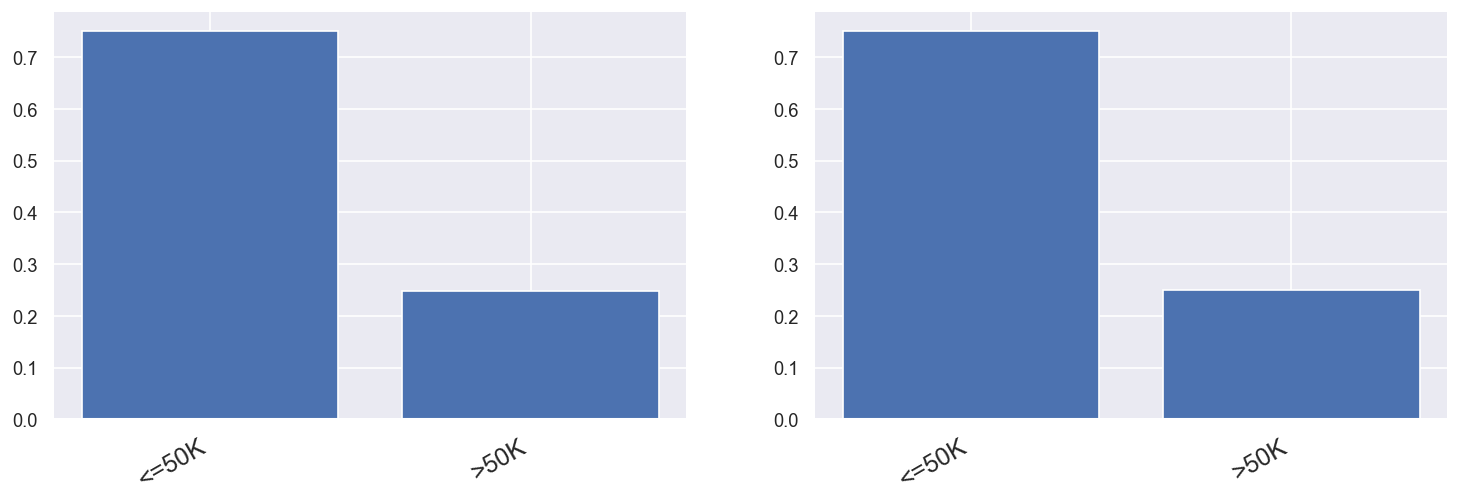

In [81]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

#### 5.3 compare pairwise mutual information

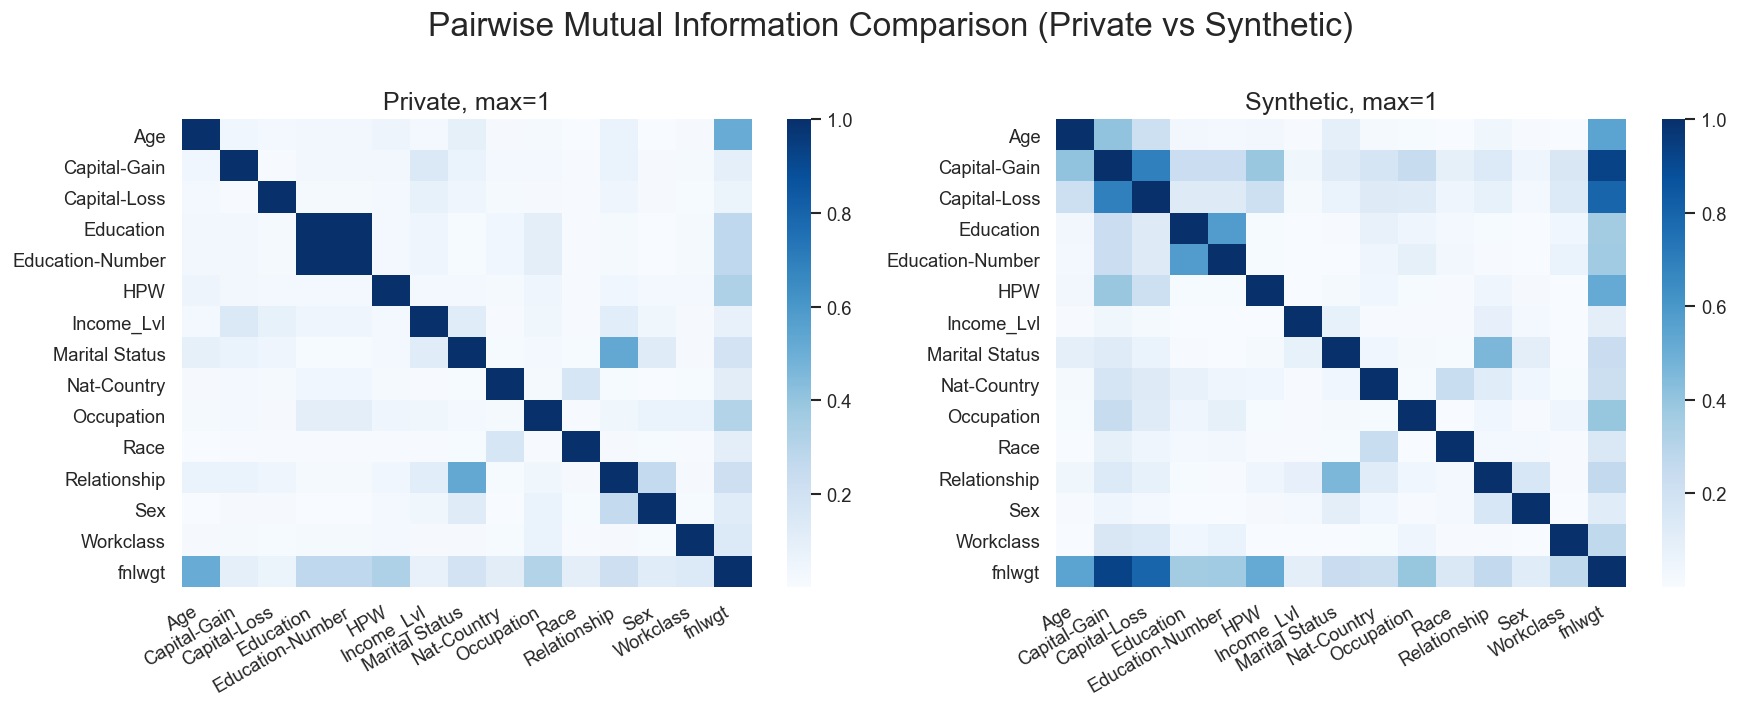

In [82]:
inspector.mutual_information_heatmap()